# 4.1. 선형 회귀


## 4.1.1. 정규방정식

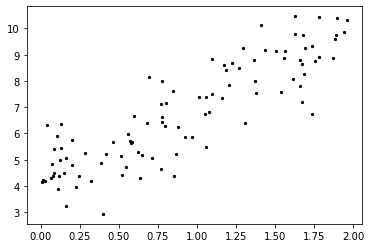

In [1]:
import numpy as np
import matplotlib.pyplot as plt


X = 2 * np.random.rand(100, 1) # Uniform distribution
y = 4 + 3 * X + np.random.randn(100, 1) # 표준정규분포

fig, sub = plt.subplots()

sub.scatter(X, y, s = 5, c = "k")

plt.show()

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[4.17125185],
       [2.85314887]])

In [3]:
X

array([[0.24840487],
       [0.51238957],
       [0.52238932],
       [1.37006542],
       [1.05140948],
       [0.08343552],
       [0.08874891],
       [1.30921379],
       [1.68846109],
       [0.77287254],
       [1.55685016],
       [1.61274642],
       [1.62691353],
       [0.6513496 ],
       [0.01017504],
       [0.7936259 ],
       [0.16454955],
       [0.85386009],
       [1.93943498],
       [0.57014687],
       [0.06717723],
       [1.56344008],
       [1.50504449],
       [0.54423928],
       [0.87732494],
       [1.43742323],
       [0.77795847],
       [0.02526403],
       [0.0765208 ],
       [0.86821479],
       [1.07547675],
       [1.53869305],
       [0.13181359],
       [0.3994739 ],
       [0.96910227],
       [0.63264654],
       [1.01226483],
       [0.11693355],
       [0.62500065],
       [1.78317711],
       [0.76738233],
       [0.57843965],
       [0.1031606 ],
       [1.18277426],
       [0.20001144],
       [1.3632315 ],
       [0.127034  ],
       [0.017

In [4]:
X_b

array([[1.        , 0.24840487],
       [1.        , 0.51238957],
       [1.        , 0.52238932],
       [1.        , 1.37006542],
       [1.        , 1.05140948],
       [1.        , 0.08343552],
       [1.        , 0.08874891],
       [1.        , 1.30921379],
       [1.        , 1.68846109],
       [1.        , 0.77287254],
       [1.        , 1.55685016],
       [1.        , 1.61274642],
       [1.        , 1.62691353],
       [1.        , 0.6513496 ],
       [1.        , 0.01017504],
       [1.        , 0.7936259 ],
       [1.        , 0.16454955],
       [1.        , 0.85386009],
       [1.        , 1.93943498],
       [1.        , 0.57014687],
       [1.        , 0.06717723],
       [1.        , 1.56344008],
       [1.        , 1.50504449],
       [1.        , 0.54423928],
       [1.        , 0.87732494],
       [1.        , 1.43742323],
       [1.        , 0.77795847],
       [1.        , 0.02526403],
       [1.        , 0.0765208 ],
       [1.        , 0.86821479],
       [1.

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)

y_predict

array([[4.17125185],
       [9.8775496 ]])

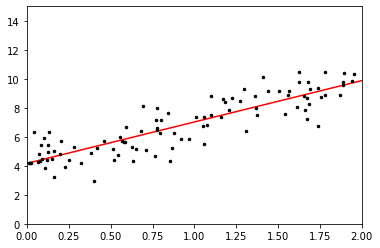

In [6]:
fig, sub = plt.subplots()

sub.plot(X_new, y_predict, "r-")
sub.plot(X, y, "k.", ms = 5)

sub.axis([0, 2, 0, 15])

plt.show()

In [7]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.17125185]), array([[2.85314887]]))

In [8]:
lin_reg.predict(X_new)

array([[4.17125185],
       [9.8775496 ]])

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)

theta_best_svd # 최소제곱법

array([[4.17125185],
       [2.85314887]])

In [10]:
np.linalg.pinv(X_b).dot(y) # 유사역행렬로 풀었을 때

array([[4.17125185],
       [2.85314887]])

# 4.2. 경사 하강법


## 4.2.1. 배치 경사 하강법

* 경사 하강법의 스텝

In [11]:
eta = 0.1
n_iterations = 1000
m = 100 # 샘플 개수

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    
    theta = theta - eta * gradients

theta

array([[4.17125185],
       [2.85314887]])

## 4.2.2. 확률적 경사 하강법

In [12]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m) # m보다 작은 랜덤한 숫자 하나 출력
        
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        
        theta = theta - eta * gradients

theta

array([[4.2095681],
       [2.8824034]])

In [13]:
from sklearn.linear_model import SGDRegressor


sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.2537851]), array([2.94923607]))

# 4.3. 다항 회귀

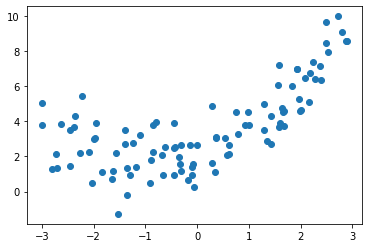

In [14]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

X[0], X_poly[0]

(array([0.74521144]), array([0.74521144, 0.5553401 ]))

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.152422]), array([[0.94024917, 0.49413446]]))

# 4.4. 학습 곡선

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[: m], y_train[: m])
        y_train_predict = model.predict(X_train[: m])
        y_val_predict   = model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train[: m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", lw = 1, label = "훈련")
    plt.plot(np.sqrt(val_errors), "b-", lw = 1, label = "검증")
    plt.show()

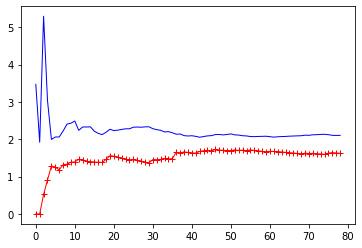

In [18]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

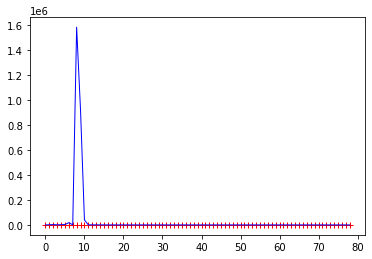

In [19]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

# 4.5. 규제가 있는 선형 모델
## 4.5.1. 릿지 회귀

In [20]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y)

ridge_reg.predict([[1.5]])

array([[4.94370863]])

In [21]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X, y.ravel())

sgd_reg.predict([[1.5]])

array([4.93742852])

## 4.5.2. 라쏘 회귀

In [22]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)

lasso_reg.predict([[1.5]])

array([4.89663693])

## 4.5.3. 엘라스틱넷

In [23]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)

elastic_net.predict([[1.5]])

array([4.89898774])

In [24]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 90, include_bias = False)),
    ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True, penalty = None, learning_rate = "constant",\
                       eta0 = 0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train' is not defined

# 4.6. 로지스틱 회귀
## 4.6.1. 결정 경계

In [25]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [26]:
X = iris["data"][:, 3 :]
y = (iris["target"] == 2).astype(np.int)

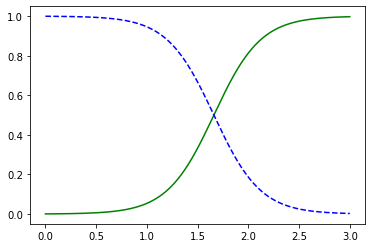

In [27]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label = "Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label = "Not Iris virginica")

plt.show()

In [28]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## 4.6.4. 소프트맥스 회귀

In [29]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [30]:
softmax_reg.predict([[5, 2]])

array([2])

In [31]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [32]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')